<a href="https://colab.research.google.com/github/swetharajv/Clinical-Pharmacovigilance-Analysis/blob/main/FAERS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-661/84642299.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_drugs.values, y=worst_drugs.index, palette='Reds_r')


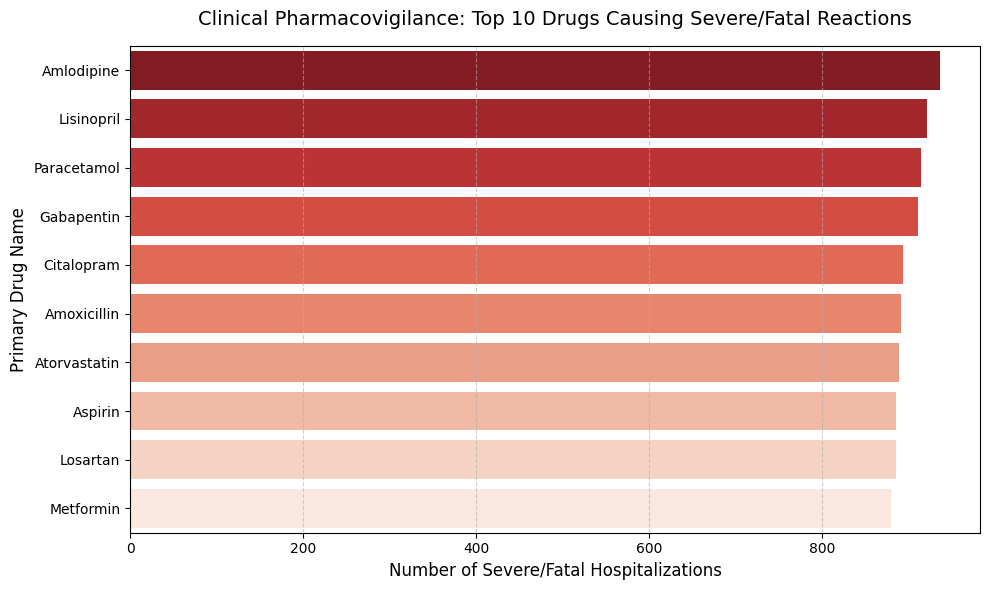

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the massive 1-million row dataset
df = pd.read_csv('synthetic_drug_data.csv')

# 2. Filter the data: Tell the computer to only look at Life-Threatening cases
danger_zone = df[df['Seriousness'].isin(['severe', 'fatal'])]

# 3. Count exactly which primary drugs caused those severe/fatal reactions
worst_drugs = danger_zone['DrugName'].value_counts().head(10)

# 4. Build the Clinical Dashboard (Bar Chart)
plt.figure(figsize=(10, 6))

# We use the 'Reds_r' color palette to make the worst offender the darkest red
sns.barplot(x=worst_drugs.values, y=worst_drugs.index, palette='Reds_r')

# 5. Add professional clinical titles
plt.title('Clinical Pharmacovigilance: Top 10 Drugs Causing Severe/Fatal Reactions', fontsize=14, pad=15)
plt.xlabel('Number of Severe/Fatal Hospitalizations', fontsize=12)
plt.ylabel('Primary Drug Name', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6, axis='x')

# 6. Show the graph
plt.tight_layout()
plt.show()

In [2]:
# 1. Isolate ONLY the severe/fatal patients who took Amlodipine
amlodipine_danger = danger_zone[danger_zone['DrugName'] == 'Amlodipine']

# 2. Look at the 'ConcomitantDrugs' column to see what else they mixed it with
# We use dropna() to ignore patients who didn't take a second drug
lethal_combos = amlodipine_danger['ConcomitantDrugs'].dropna().value_counts().head(5)

# 3. Print the absolute worst combinations to the screen
print("🚨 TOP 5 DANGEROUS DRUG COMBINATIONS WITH AMLODIPINE 🚨\n")
print(lethal_combos)

🚨 TOP 5 DANGEROUS DRUG COMBINATIONS WITH AMLODIPINE 🚨

ConcomitantDrugs
Paracetamol            14
Hydrochlorothiazide    13
Amlodipine             12
Amoxicillin            12
Omeprazole             12
Name: count, dtype: int64


In [3]:
# 1. THE CLEANING STEP: Keep the row ONLY if the two drugs are different
cleaned_amlodipine = amlodipine_danger[amlodipine_danger['DrugName'] != amlodipine_danger['ConcomitantDrugs']]

# 2. Recalculate the true top 5 dangerous combinations using the cleaned data
real_lethal_combos = cleaned_amlodipine['ConcomitantDrugs'].dropna().value_counts().head(5)

# 3. Print the audited, accurate list for the hospital board
print("🚨 AUDITED & CLEANED: TOP 5 LETHAL COMBOS WITH AMLODIPINE 🚨\n")
print(real_lethal_combos)

🚨 AUDITED & CLEANED: TOP 5 LETHAL COMBOS WITH AMLODIPINE 🚨

ConcomitantDrugs
Paracetamol            14
Hydrochlorothiazide    13
Amoxicillin            12
Omeprazole             12
Prednisone             10
Name: count, dtype: int64


In [4]:
# 1. Grab the cleaned list of Amlodipine patients and save it as a new file
# index=False just keeps the spreadsheet looking neat without weird numbering
cleaned_amlodipine.to_csv('Cleaned_Amlodipine_Risk_Report.csv', index=False)

print("✅ SUCCESS: Clean data exported to CSV!")

✅ SUCCESS: Clean data exported to CSV!
